In [1]:
import nltk

In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk import download
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer

In [11]:
data = pd.read_json("https://raw.githubusercontent.com/Premalatha-success/yhills/main/recipes.json", lines=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1615 non-null   object
 1   url          1615 non-null   object
 2   Description  1427 non-null   object
 3   Author       1609 non-null   object
 4   Ingredients  1615 non-null   object
 5   Method       1615 non-null   object
dtypes: object(6)
memory usage: 75.8+ KB


In [13]:
data['Ingredients'].head(5)

0    [200g dark muscovado sugar, 175g butter, chopp...
1    [500g strong white flour, plus extra for dusti...
2    [280g self-raising flour, 175g golden caster s...
3    [2 carrots, halved, ½ white cabbage, shredded,...
4    l double cream, 400g Greek yoghurt, 4 tbs...
Name: Ingredients, dtype: object

In [14]:
data['Ingredient'] = data['Ingredients'].map(lambda x: re.sub(r'[^a-zA-A]',' ', str(x)))

In [15]:
data = data.dropna(subset=['Ingredients'])

In [21]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]    | Do

[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\omw.zip.
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\omw-1.4.zip.
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading packag

[nltk_data]    |   Unzipping corpora\verbnet3.zip.
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\webtext.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\word2vec_sample.zip.
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\wordnet.zip.
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\wordnet2021.zip.
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data.

True

In [22]:
stop = stopwords.words('english') + ['tsp', 'tbsp', 'finely','extra', 'chopped' ]
stop


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
def remove_encoding_word(word):
    word = str(word)
    word = word.encode('ASCII', 'ignore').decode('ASCII')
    return word

In [25]:
def remove_encoding_text(text):
    text = str(text)
    text = ' '.join(remove_encoding_word(word) for word in text.split()if word not in stop)
    return text


In [27]:
data['Ingredients'] = data['Ingredients'].apply(remove_encoding_text)

In [29]:
text = ' '.join(words for words in data['Ingredients'])
len(text)

436822

In [30]:
lemma = WordNetLemmatizer().lemmatize
lemma('leaves')

'leaf'

In [37]:
def tokenize(document):
    tokens = [lemma(w) for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens

In [38]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = ((2,2)), stop_words = stop, strip_accents = 'unicode')

In [39]:
tdm = vectorizer.fit_transform(data['Ingredients'])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [40]:
vectorizer.vocabulary_.items()

dict_items([('dark muscovado', 2506), ('muscovado luxury', 6113), ('luxury mixed', 5589), ('mixed dried', 5980), ('dried glac', 2932), ('glac grated', 3894), ('grated fresh', 4091), ('fresh root', 3544), ('root juice', 7985), ('juice dark', 4801), ('dark brandy', 2469), ('brandy orange', 701), ('orange roughly', 6475), ('roughly large', 8065), ('large ground', 5033), ('ground plain', 4328), ('plain baking', 7107), ('baking mixed', 247), ('mixed pack', 6016), ('pack used', 6635), ('used warm', 10373), ('warm apricotjam', 10636), ('apricotjam shredless', 121), ('shredless pack', 8537), ('pack fondant', 6554), ('fondant gold', 3404), ('gold silver', 3934), ('silver gold', 8559), ('silver sugared', 8564), ('strong white', 9538), ('white plus', 10841), ('plus sachet', 7355), ('sachet dried', 8169), ('dried unsalted', 3005), ('unsalted softened', 10230), ('softened room', 9096), ('room unsalted', 7970), ('unsalted soft', 10229), ('soft brown', 9039), ('brown ground', 826), ('ground dried', 4

In [43]:
tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [45]:
tfidf_weights[0:10]

[('dark muscovado', 7.694721229655227),
 ('muscovado luxury', 0.5981481382322399),
 ('luxury mixed', 1.193872710438525),
 ('mixed dried', 6.991241406250305),
 ('dried glac', 1.7871813023567897),
 ('glac grated', 0.5981481382322399),
 ('grated fresh', 0.5981481382322399),
 ('fresh root', 3.2743467116984784),
 ('root juice', 0.5981481382322399),
 ('juice dark', 1.4504255462342788)]

In [47]:
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights))

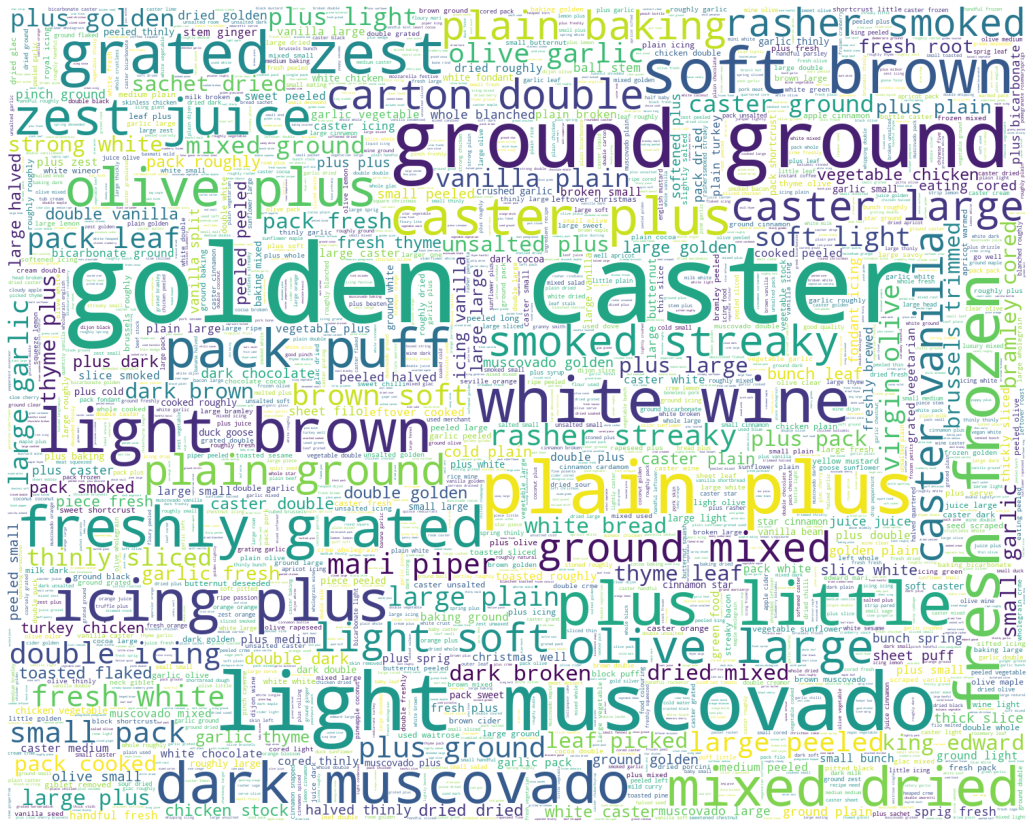

In [57]:
plt.figure(figsize=(20,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('recipes_wordcloud.png')